In [1]:
import os

training_dir = os.path.join('..', 'data', 'training')

print("Number of files per class (training) \n")
for Class in ['noisy']:
    class_dir = os.path.join(training_dir, Class)
    print(f"{Class}: {len([os.path.join(class_dir, _) for _ in os.listdir(class_dir) if _.endswith('.mat')])}")

training_dir = os.path.join('..', 'data', 'validation')

Number of files per class (training) 

noisy: 284


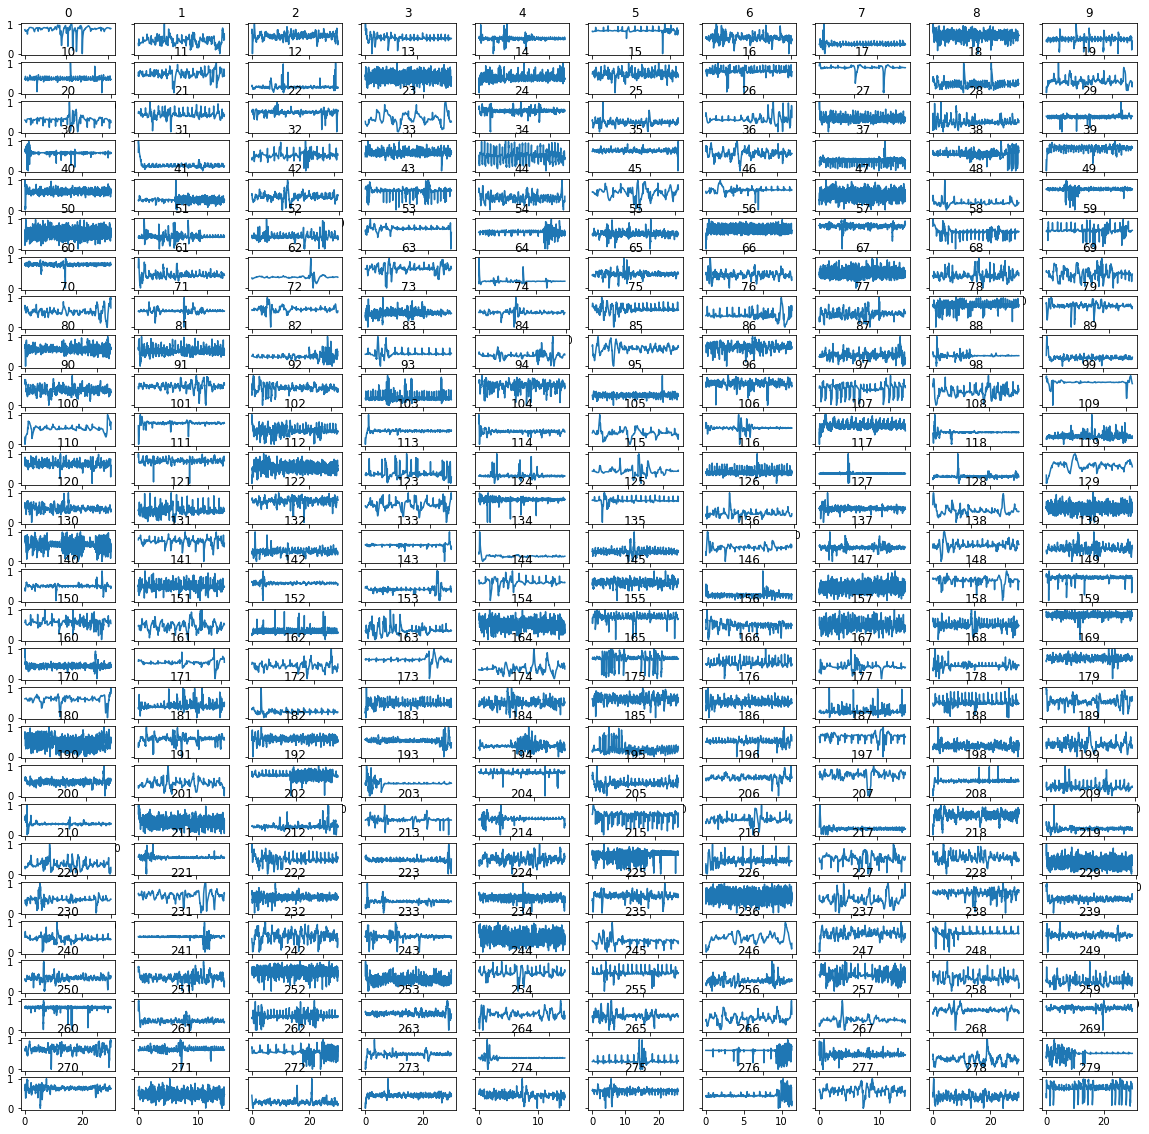

In [2]:
import sys
import scipy.io
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sampling_freq = 300
training_dir = os.path.join('..', 'data', 'training')
noisy_dir = os.path.join(training_dir, 'noisy')

fig, axs = plt.subplots(28, 10, sharey=True)
fig.set_size_inches(20, 20)

data = []
for f in os.listdir(noisy_dir):
    if f.endswith(".mat"):
        file = os.path.join(noisy_dir, f)
        mat_data = scipy.io.loadmat(file)
        sequence = mat_data['val'][0]
        sequence = (sequence - min(sequence)) / (max(sequence) - min(sequence))
        data.append(sequence)
        
idx = np.random.permutation(len(data))
data = np.array(data, dtype=object)[idx]

for i in range(28):
    for j in range(10):
        time = np.linspace(0, len(data[10*i+j]) / sampling_freq, len(data[10*i+j]))
        axs[i][j].set_title(10*i+j)
        axs[i][j].plot(time, data[10*i+j])

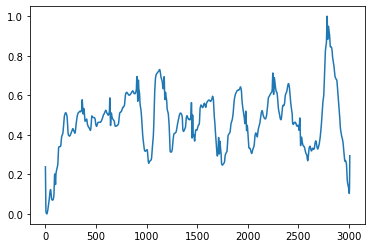

In [10]:
plt.plot(data[236])

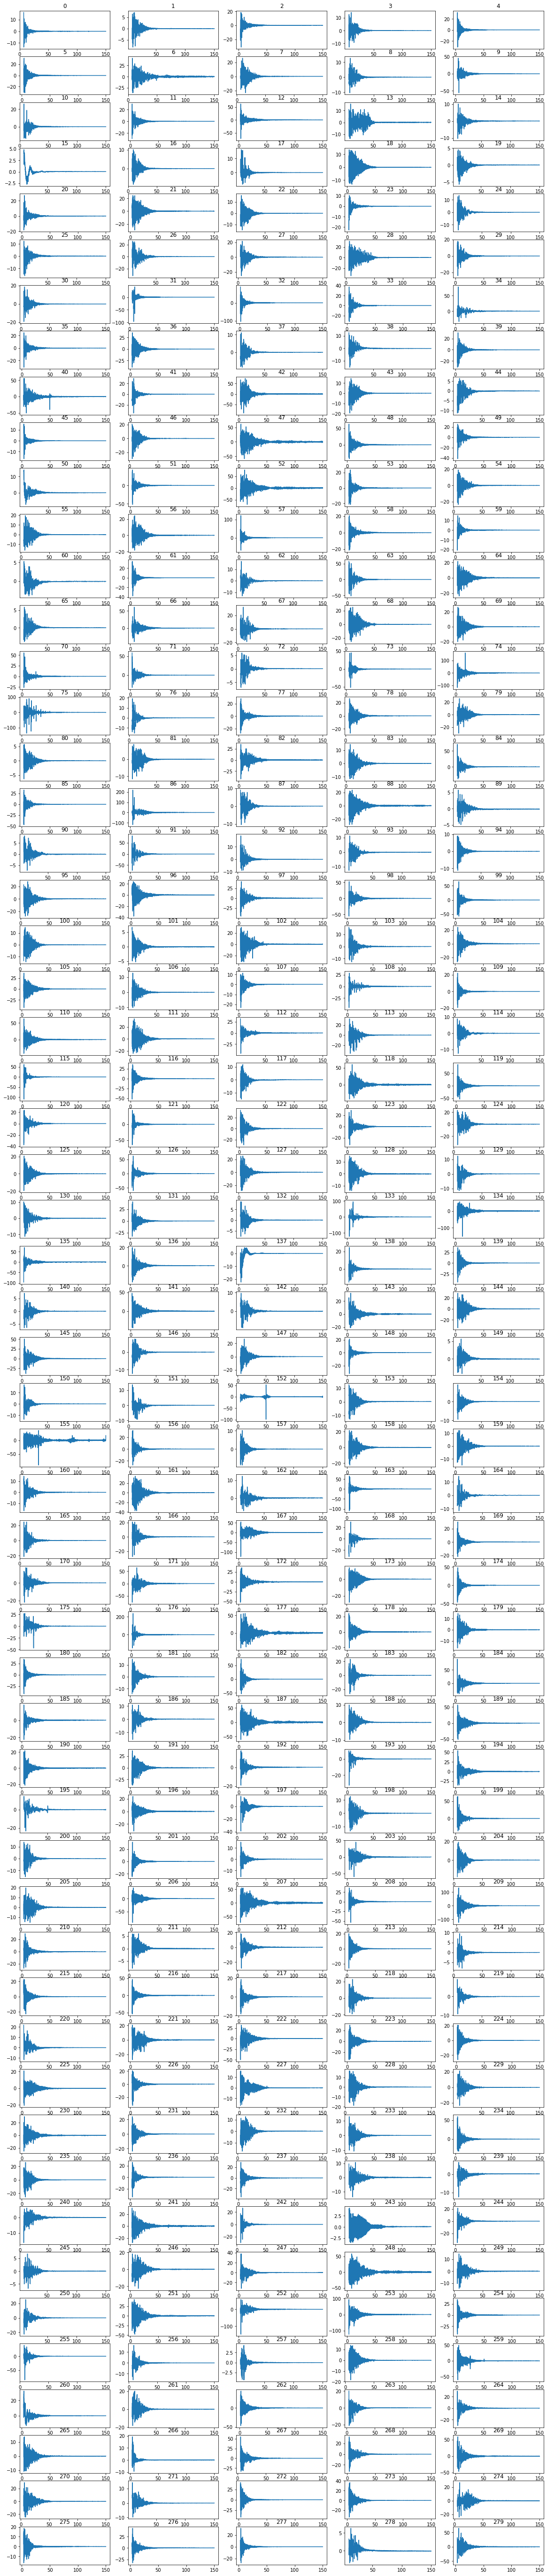

In [77]:
fig, axs = plt.subplots(56, 5)
fig.set_size_inches(20,100)

for i in range(56):
    for j in range(5):
        fourier_transform = np.fft.rfft(data[5*i+j])
        frequency = np.linspace(0, sampling_freq/2, len(fourier_transform))
        
        axs[i][j].set_title(5*i+j)
        axs[i][j].plot(frequency[100:], fourier_transform.real[100:])

/Users/Yoav2/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/Yoav2/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


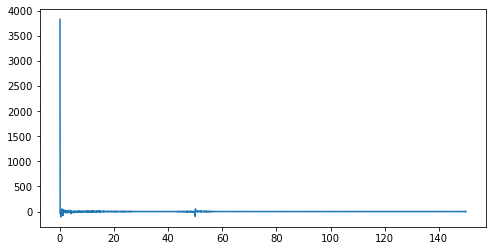

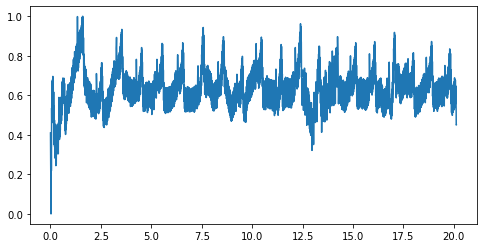

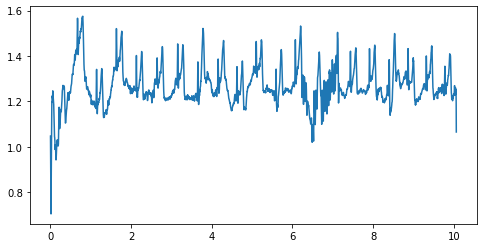

In [79]:
# PLI: 152,

idx = 152
y = data[idx]


time = np.linspace(0, len(data[idx]) / sampling_freq, len(data[idx]))

fourier_transform = np.fft.rfft(y)

frequency = np.linspace(0, sampling_freq/2, len(fourier_transform))

plt.figure(figsize=(8, 4))
plt.plot(frequency, fourier_transform)

fourier_transform[800:1200] /= 10000

y_r = np.fft.ifft(fourier_transform)

plt.figure(figsize=(8, 4))
plt.plot(time, y)

time = np.linspace(0, len(y_r) / sampling_freq, len(y_r))

plt.figure(figsize=(8, 4))
plt.plot(time, y_r)
